## Problem Statement :-
### While booking a hotel have you ever wondered when is the best time to book a hotel room is? How early should you book to get the best price? What if you need to cancel your booking? This hotel booking dataset help you explore these questions.

 This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. We will perform exploratory data analysis with python to get insight from the data using matplotlib and seaborn libraries.

# Importing libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('max_columns',None)

# Importing Data

In [3]:
hotel=pd.read_csv('E:\Akansha\Datasets/hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
hotel.shape

(119390, 32)

# Data Pre-processing

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Some columns has high number of missing values. Let's check the percentage of these missing values.

In [7]:
per=round((hotel.isnull().sum())*100/len(hotel.index),2)
per

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


#### The column company has almost 94% missing values in the data. It makes no sense to do analysis with such huge missing data. So, we will simply drop this column.
#### Rest of the columns has low numbers of missing data so we will impute these null values.

In [8]:
# Imputing missing values

hotel=hotel.drop(['company'],axis=1)

hotel['country'].fillna('Unknown',inplace=True)

hotel.fillna(0,inplace=True)

In [9]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### Now, there are no null values.

In [10]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


#### There are bookings for 0 adults. This seems little weird to book a hotel just for children or babies.

In [11]:
# Renaming the column for better readability

hotel=hotel.rename({'adr':'price'},axis=1)

In [12]:
hotel['children'].unique()   

array([ 0.,  1.,  2., 10.,  3.])

In [13]:
hotel['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [14]:
hotel['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

#### Let's filter out when adults, children and babies are 0

In [15]:
filter=(hotel['children']==0) & (hotel['adults']==0) & (hotel['babies']==0)
hotel[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


#### These are the wrong entries in the data because at a time children, adults and babies cannot be zero.

In [16]:
# Filtering the data

data=hotel[~filter]
data.shape

(119210, 31)

# Data Visualization

In [18]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

#### We have the data of two different hotels. But first let's check how many Resort Hotels and City Hotels we have in our data.

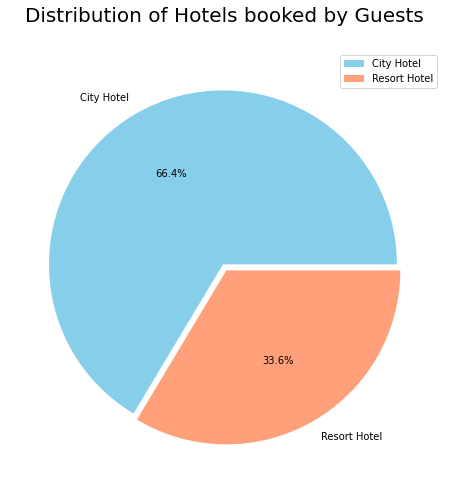

In [19]:
plt.figure(figsize=(10,8))
myexplode=[0.02,0.02]
plt.pie(x=data['hotel'].value_counts(),labels=data['hotel'].value_counts().index,colors=['skyblue','lightsalmon'],autopct='%0.01f%%',explode=myexplode)
plt.title('Distribution of Hotels booked by Guests\n',fontsize=20)
plt.legend()
plt.show()

#### We see that most of our data corresponds to City Hotels. Almost a third of the bookings are for city hotels, but these include bookings that were both canceled and not canceled
#### For a better comprehension, lets split the data.

In [17]:
resort= data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]     #resort hotel
city= data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]         #city hotel

In [18]:
resort.shape

(28927, 31)

In [19]:
city.shape

(46084, 31)

##  Country of the Guests

In [26]:
country=data['country'].value_counts()[0:20].reset_index()
country.columns=['Country','No. of Guests']
country

,Country,No. of Guests
0,PRT,48483
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
5,ITA,3761
6,IRL,3374
7,BEL,2342
8,BRA,2222
9,NLD,2103


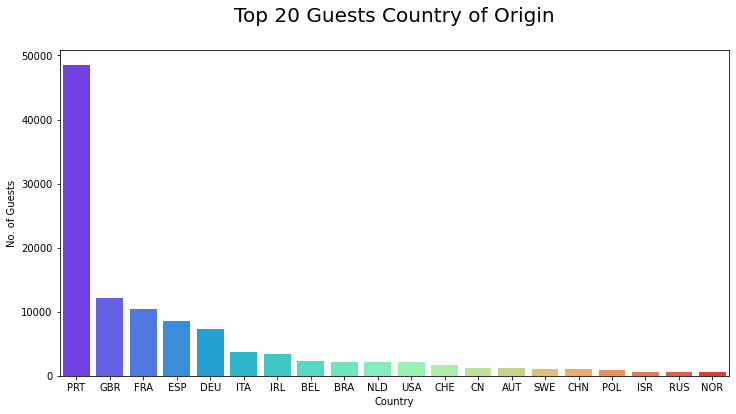

In [24]:
plt.figure(figsize=(12,6))
plt.title('Top 20 Guests Country of Origin\n',fontsize=20)
sns.barplot(x='Country',y='No. of Guests',data=country,palette='rainbow')
plt.show()

####  People from all over the world are staying in the hotel but most of the guest are from Portugal.

##  Prices of Rooms 

In [20]:
not_canceled=data[data['is_canceled']==0]   
not_canceled.shape                               #not_canceled is the data in which booking has not been canceled.

(75011, 31)

In [21]:
canceled=data[data['is_canceled']==1]
canceled.shape                                   #canceled is the data in which booking has been canceled.

(44199, 31)

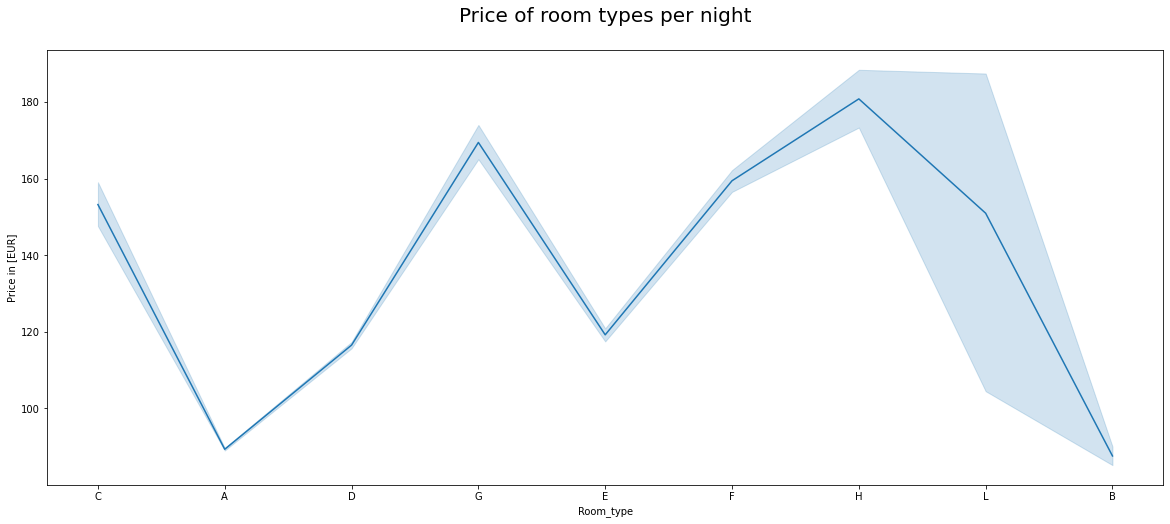

In [27]:
plt.figure(figsize=(20,8))
plt.title('Price of room types per night\n',fontsize=20)
sns.lineplot(x='reserved_room_type',y='price',data=not_canceled,palette='rocket')
plt.xlabel('Room_type')
plt.ylabel('Price in [EUR]')
plt.show()

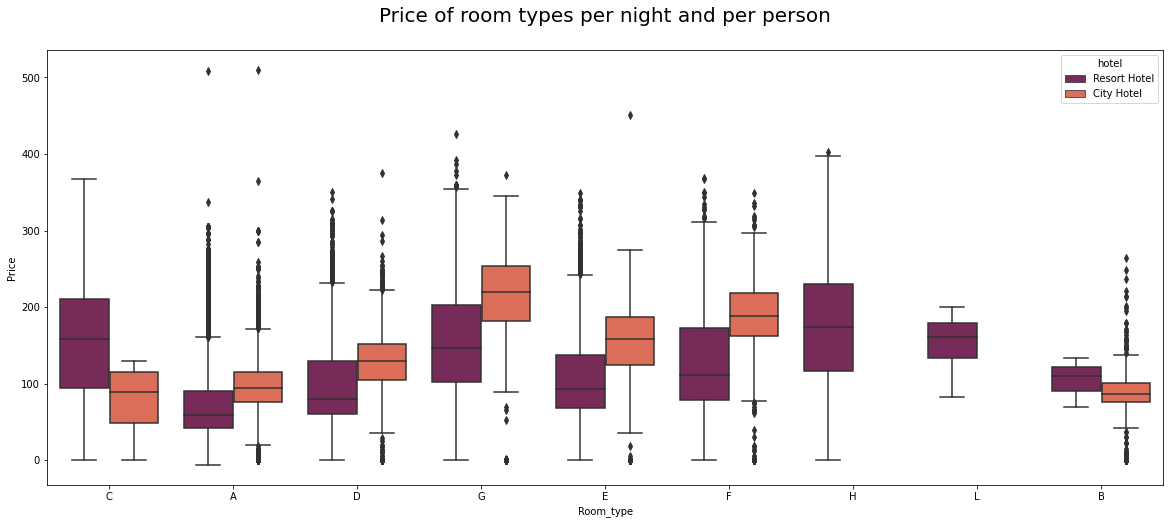

In [58]:
plt.figure(figsize=(20,8))
plt.title('Price of room types per night and per person\n',fontsize=20)
sns.boxplot(x='reserved_room_type',y='price',data=not_canceled, hue='hotel',palette='rocket')
plt.xlabel('Room_type')
plt.ylabel('Price')
plt.show()

#### Let's check the prices of hotel over a year

In [29]:
import sort_dataframeby_monthorweek as sd 

In [30]:
resort_data=resort.groupby('arrival_date_month')['price'].mean().reset_index()
resort_data.columns=['Month','Price_for_Resort']
resort_data=sd.Sort_Dataframeby_Month(resort_data,'Month')
resort_data

,Month,Price_for_Resort
0,January,48.761125
1,February,54.147478
2,March,57.056838
3,April,75.867816
4,May,76.657558
5,June,107.974850
6,July,150.122528
7,August,181.205892
8,September,96.416860
9,October,61.775449


In [31]:
city_data=city.groupby('arrival_date_month')['price'].mean().reset_index()
city_data.columns=['Month','Price_for_City']
city_data=sd.Sort_Dataframeby_Month(city_data,'Month')
city_data

,Month,Price_for_City
0,January,82.330983
1,February,86.520062
2,March,90.658533
3,April,111.962267
4,May,120.669827
5,June,117.874360
6,July,115.818019
7,August,118.674598
8,September,112.776582
9,October,102.004672


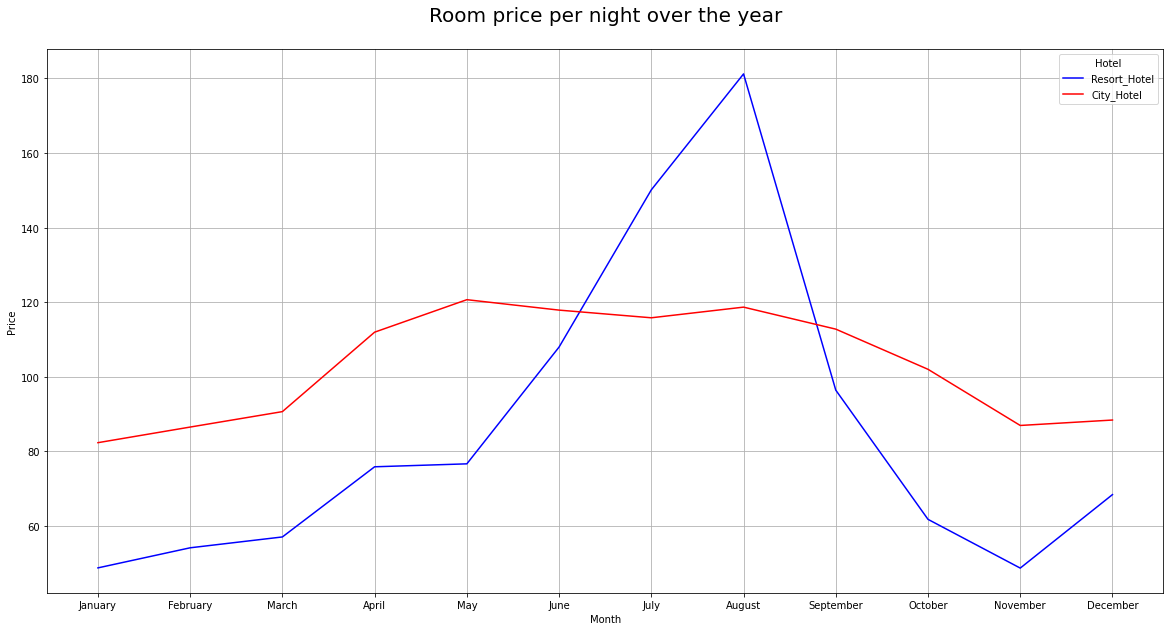

In [32]:
x=resort_data.merge(city_data, on='Month')

plt.figure(figsize=(20,10))
sns.lineplot(x='Month',y='Price_for_Resort',data=x,color='blue')
sns.lineplot(x='Month',y='Price_for_City',data=x,color='r')
plt.title('Room price per night over the year\n',fontsize=20)
plt.grid()
plt.ylabel('Price')
plt.legend(title='Hotel',labels=['Resort_Hotel','City_Hotel'])
plt.show()

#### This clearly shows that resort hotel prices are much much higher during the summer whereas the prices of city hotel doesn't vary that much and it is most expensive during spring and autumn season.
#### The average daily rate fluctuates more for resort hotels than city hotels.

## Market Segment & Distribution Channel

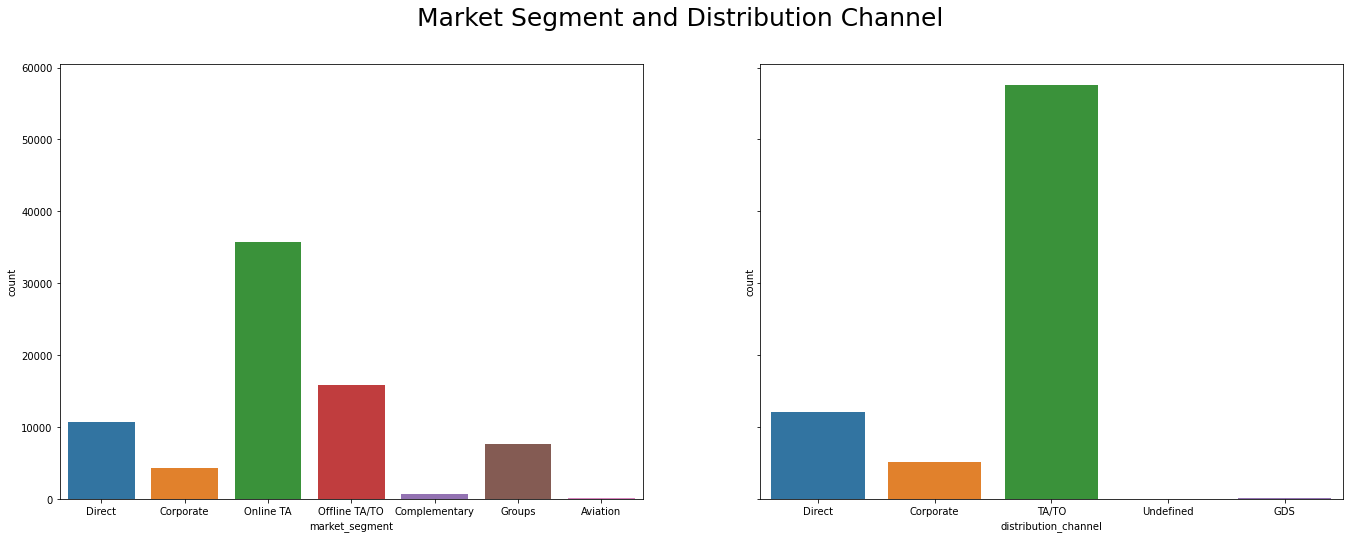

In [33]:
fig,axes=plt.subplots(1,2,figsize=(23,8),sharey=True)
sns.countplot('market_segment',data=not_canceled,ax=axes[0])
sns.countplot('distribution_channel',data=not_canceled,ax=axes[1])
plt.suptitle('Market Segment and Distribution Channel\n',fontsize=25)
plt.show()

#### Online TA dominate in each and every category of market segment. Almost 50% of the booking are going through online way.
####  Majority DIstribution channels and Market segment were Travel agencies whether online/offline. So better focus more on this

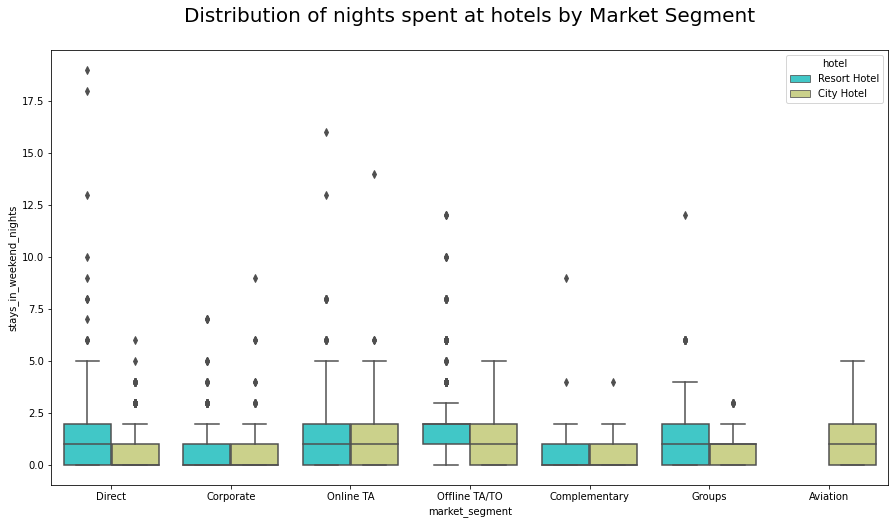

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',data=not_canceled,hue='hotel',palette='rainbow')
plt.title('Distribution of nights spent at hotels by Market Segment\n',fontsize=20)
plt.show()

##  Preference of Guests

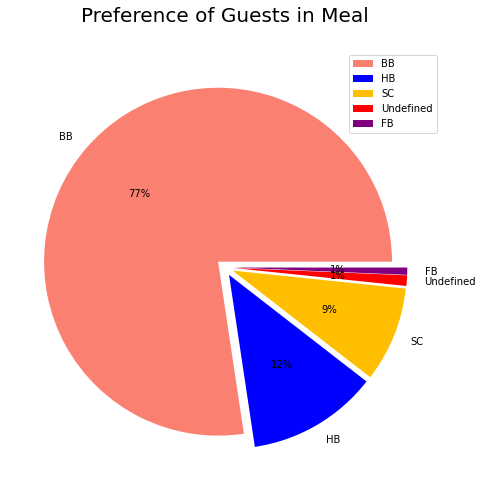

In [122]:
# Preference of Guests in Meal

plt.figure(figsize=(15,8))
myexplode=[0.05,0.05,0.05,0.05,0.05]
plt.pie(x=data['meal'].value_counts(),labels=data['meal'].value_counts().index,autopct='%1.0f%%',colors=['#FA8072','b','#FFBF00','r','purple'],explode=myexplode)
plt.title('Preference of Guests in Meal\n',fontsize=20)
plt.legend()
plt.show()

#### Approximately 77% of the guests opt for BB i.e. bed and breakfast, followed by 12% for HB i.e. half board which is breakfast and one other meal (usually dinner).

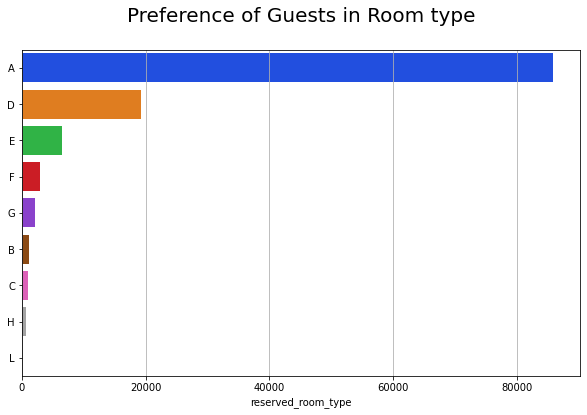

In [106]:
# Preference of Guests in room type

plt.figure(figsize=(10,6))
sns.barplot(x=data['reserved_room_type'].value_counts(),y=data['reserved_room_type'].value_counts().index,palette='bright')
plt.grid(axis='x')
plt.title('Preference of Guests in Room type\n',fontsize=20)
plt.show()

#### Most of the guests prefer A room type

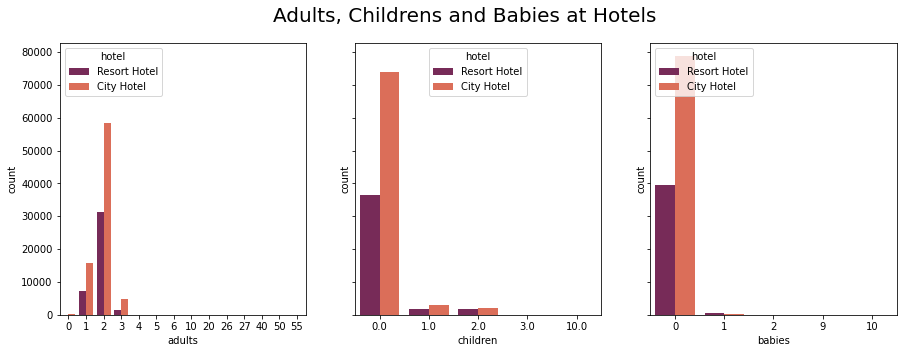

In [100]:
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)

sns.countplot('adults',data=data,hue='hotel',ax=axes[0],palette='rocket')
sns.countplot('children',data=data,hue='hotel',ax=axes[1],palette='rocket')
sns.countplot('babies',data=data,hue='hotel',ax=axes[2],palette='rocket')

plt.suptitle('Adults, Childrens and Babies at Hotels\n',fontsize=20)
plt.show()

#### Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel

#### Further analysing how long guests stay at hotel

In [39]:
# To get the total nights stay of guests we will concatenate stays in weekend and week nights column and create a new column
# We are using not_canceled data here where bookings has not been canceled

not_canceled['total_nights']=not_canceled['stays_in_weekend_nights'] + not_canceled['stays_in_week_nights']
stay=not_canceled.groupby(['total_nights','hotel']).count().reset_index()
stay.head(2)

,total_nights,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,City Hotel,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
1,0,Resort Hotel,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371


In [40]:
# To know how long guests stay at hotel we need only first three rows

stay=stay.iloc[:,0:3]                                          #iloc=index location
stay=stay.rename(columns={'is_canceled':'no. of stays'})
stay.head()

,total_nights,hotel,no. of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


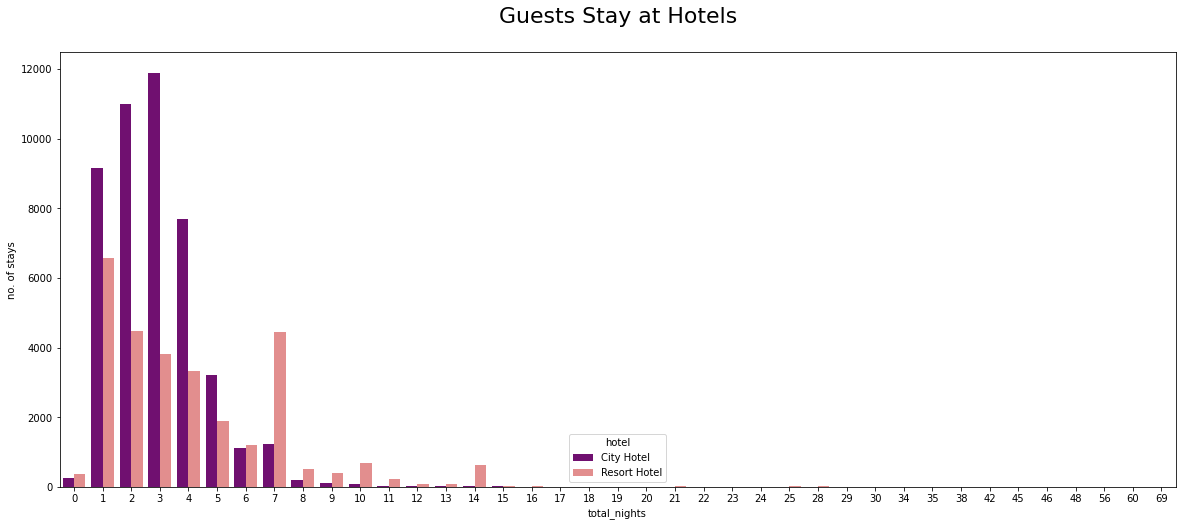

In [107]:
plt.figure(figsize=(20,8))
sns.barplot(x='total_nights',y='no. of stays',hue='hotel',data=stay,palette=['purple','lightcoral'])
plt.title('Guests Stay at Hotels\n',fontsize=22)
plt.show()

 #### For Resort hotel most popular stay duration is one, two, seven(week) respectively.
 #### For City hotel most popular duration is three, two, one and four days respectively.

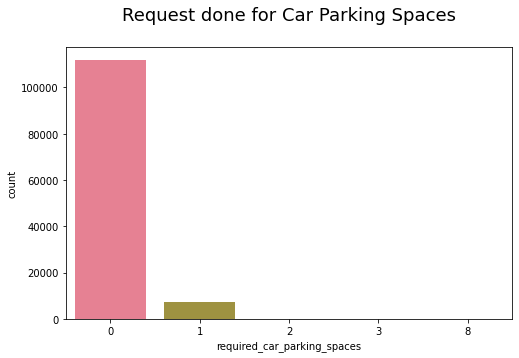

In [111]:
plt.figure(figsize=(8,5))
sns.countplot(data['required_car_parking_spaces'],palette='husl')
plt.title('Request done for Car Parking Spaces\n',fontsize=18)
plt.show()

####  Number of car parking spaces requests ranges from 0 to 8, with majority of them being 0.

## Cancelled Bookings

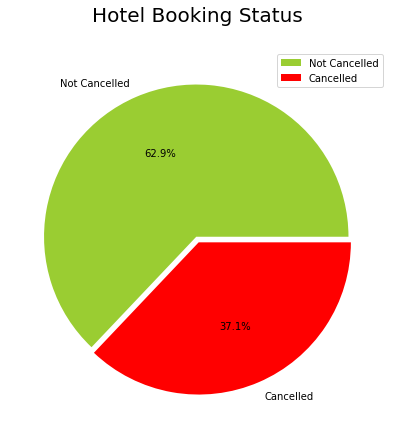

In [41]:
plt.figure(figsize=(10,7))
plt.pie(x=data['is_canceled'].value_counts(),labels=labels,autopct='%0.01f%%',explode=[0.02,0.02],colors=['yellowgreen','r'])
labels=['Not Cancelled','Cancelled']
plt.title('Hotel Booking Status\n',fontsize=20)
plt.legend(labels=['Not Cancelled','Cancelled'])
plt.show()

#### Almost 37% of the bookings were cancelled.

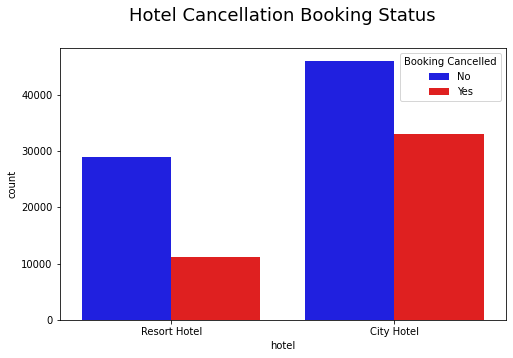

In [109]:
plt.figure(figsize=(8,5))
sns.countplot('hotel',data=data,hue='is_canceled',palette=['b','r'])
plt.legend(title='Booking Cancelled',labels=['No','Yes'])
plt.title('Hotel Cancellation Booking Status\n',fontsize=18)
plt.show()

#### Almost three quarters of the bookings at the City Hotel were canceled, while only less than half were canceled at the Resort Hotel. 
#### So, let's check what is the deposit type of the hotel.

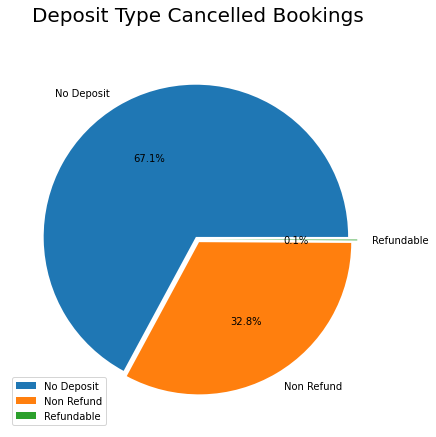

In [29]:
plt.figure(figsize=(10,7))
myexplode=[0.02,0.02,0.05]
plt.pie(x=canceled['deposit_type'].value_counts(),labels=canceled['deposit_type'].value_counts().index,autopct='%0.01f%%',explode=myexplode)
plt.legend()
plt.title('Deposit Type Cancelled Bookings\n',fontsize=20)
plt.show()

#### 67% bookings were cancelled because No Deposit was made thus the guest was not going to lose any money from the cancellation.
#### On the other hand  in the Non Refund, 32% of the guests still cancelled their booking. They must have a important reason to lose their booking.

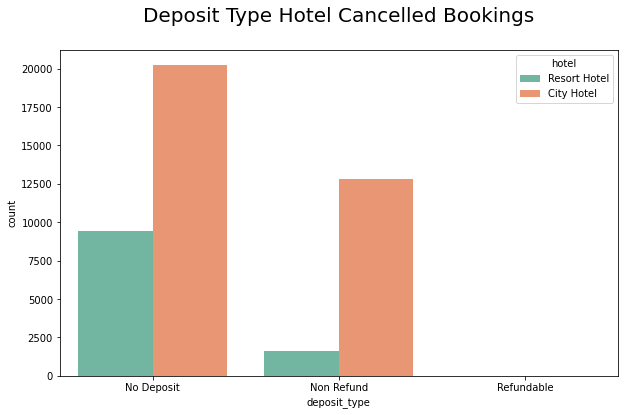

In [114]:
plt.figure(figsize=(10,6))
sns.countplot('deposit_type',hue='hotel',data=canceled,palette='Set2')
plt.title('Deposit Type Hotel Cancelled Bookings\n',fontsize=20)
plt.show()

#### Most of the bookings has been cancelled for no deposit type in both the hotels. So, there should be some non-refundable rates or collect deposits to avoid these cancellation.

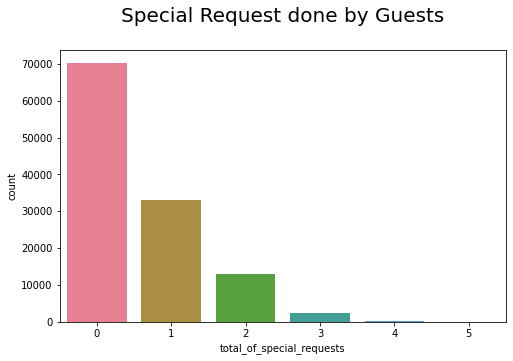

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(data['total_of_special_requests'],palette='husl')
plt.title('Special Request done by Guests\n',fontsize=20)
plt.show()

#### Almost 50% of the bookings don't have any special request.

#### Let's further analyse the relationship between special request and cancellation booking status

In [47]:
# Pivot table of relationship between special request and cancellation booking status

pivot=data.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

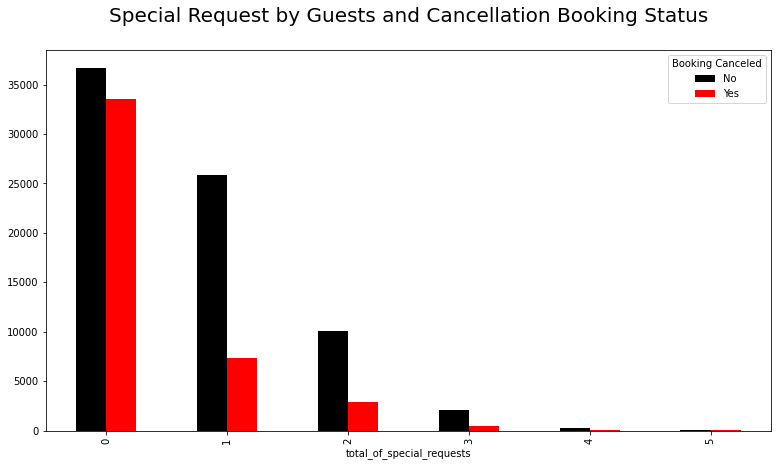

In [48]:
pivot.plot(kind='bar',figsize=(13,7),color=['black','r'])
plt.title('Special Request by Guests and Cancellation Booking Status\n',fontsize=20)
plt.legend(title='Booking Canceled',labels=['No','Yes'])
plt.show()

#### Half of the bookings without any special request have been cancelled and another half of them not been cancelled.

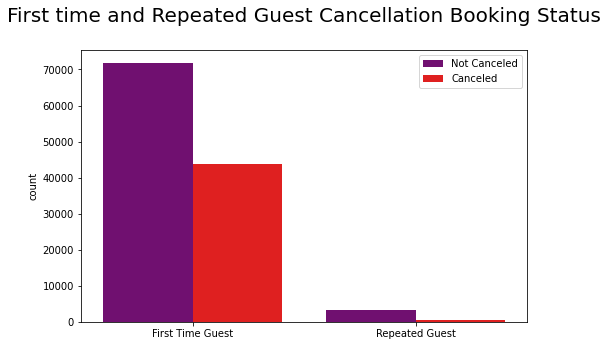

In [73]:
plt.figure(figsize=(8,5))
sns.countplot('is_repeated_guest',data=data,hue='is_canceled',palette=['purple','r'])
plt.xticks((0,1),('First Time Guest','Repeated Guest'))
plt.title('First time and Repeated Guest Cancellation Booking Status\n',fontsize=20)
plt.xlabel('')
plt.legend(labels=['Not Canceled','Canceled'])
plt.show()

#### Most of the guests are first time guests, and more than half of them cancelled their booking.

#### Let's further check which month has highest no. of cancellation.

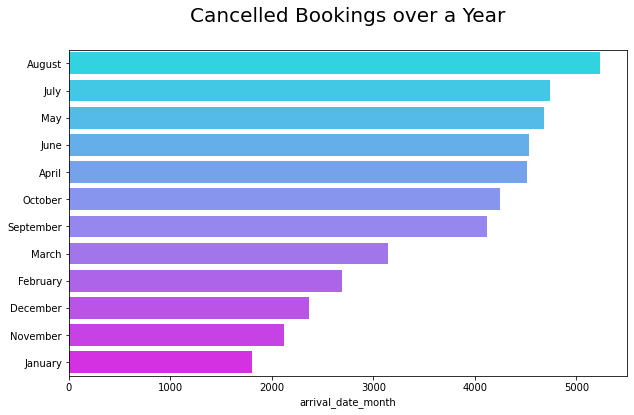

In [120]:
plt.figure(figsize=(10,6))
sns.barplot(x=canceled['arrival_date_month'].value_counts(),y=canceled['arrival_date_month'].value_counts().index,palette='cool')
plt.title('Cancelled Bookings over a Year\n',fontsize=20)
plt.show()

#### Most bookings cancelled in the month August.

## Guests Arrival in the Hotel

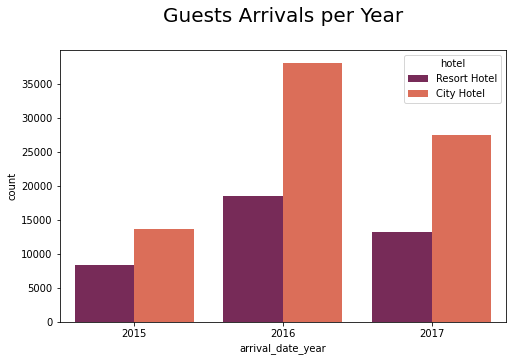

In [51]:
plt.figure(figsize=(8,5))
sns.countplot('arrival_date_year',data=data,hue='hotel',palette='rocket')
plt.title('Guests Arrivals per Year\n',fontsize=20)
plt.show()

#### Guests arrival in the hotel gradually increased in 2016 and after decreses in 2017. 
#### Let's further analyse guest arrival in each year.

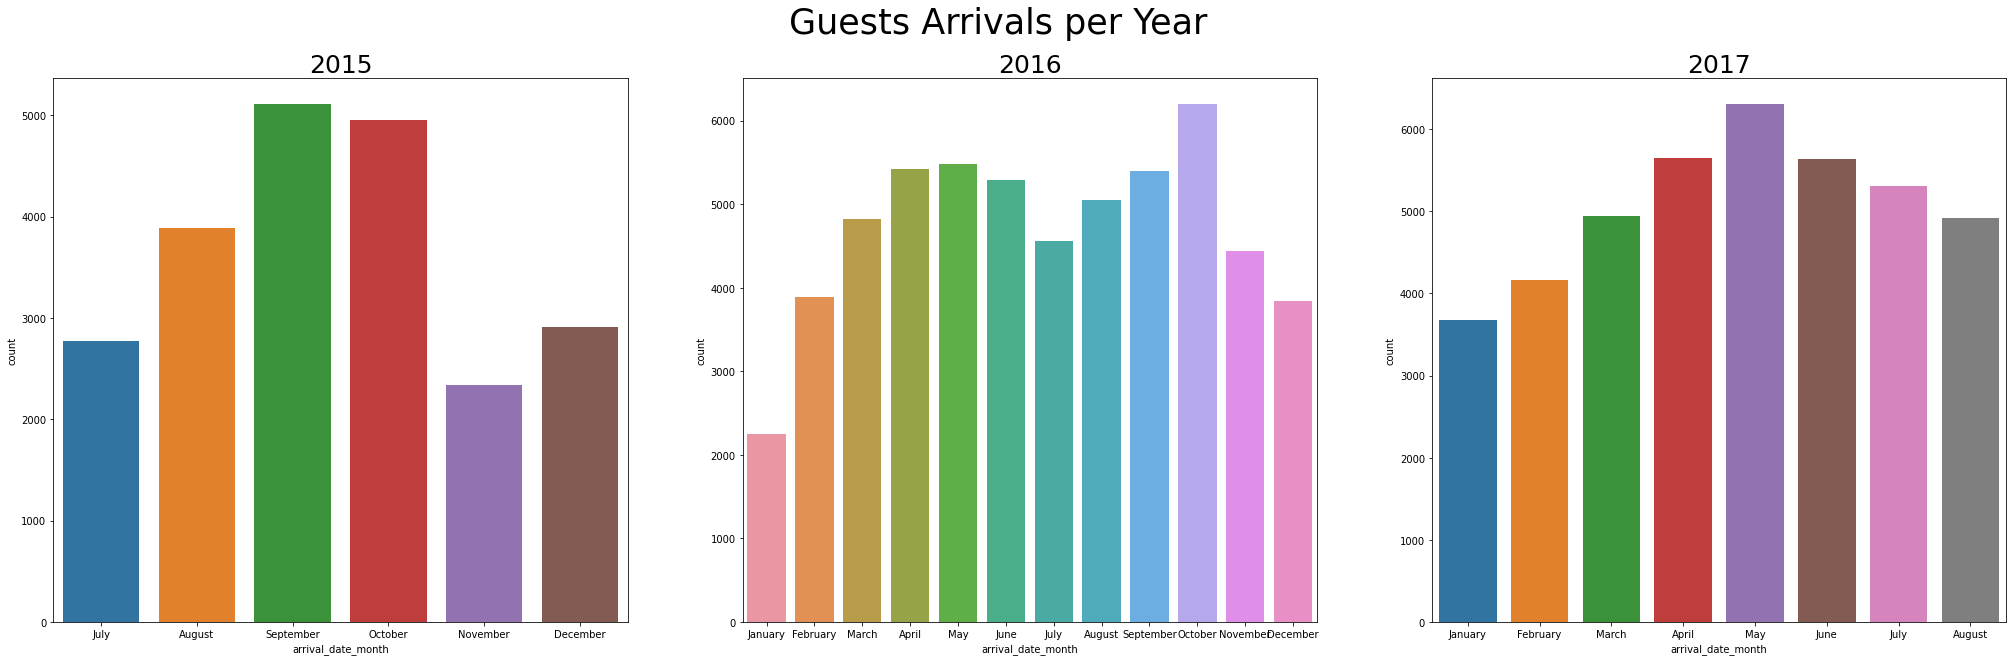

In [43]:
year_2015=data[data['arrival_date_year']==2015]
year_2016=data[data['arrival_date_year']==2016]
year_2017=data[data['arrival_date_year']==2017]

fig,axes=plt.subplots(1,3,figsize=(35,10))

sns.countplot('arrival_date_month',data=year_2015,ax=axes[0]).set_title('2015',fontsize=25)
sns.countplot('arrival_date_month',data=year_2016,ax=axes[1]).set_title('2016',fontsize=25)
sns.countplot('arrival_date_month',data=year_2017,ax=axes[2]).set_title('2017',fontsize=25)

plt.suptitle('Guests Arrivals per Year\n',fontsize=35)
plt.show()


#### We have full data of year 2016 only. In 2015, starting months data are missing till June & in 2017, ending months data are missing from September.
#### So, this could be the reason behind most guest arrival in 2016 as in the previous graph.

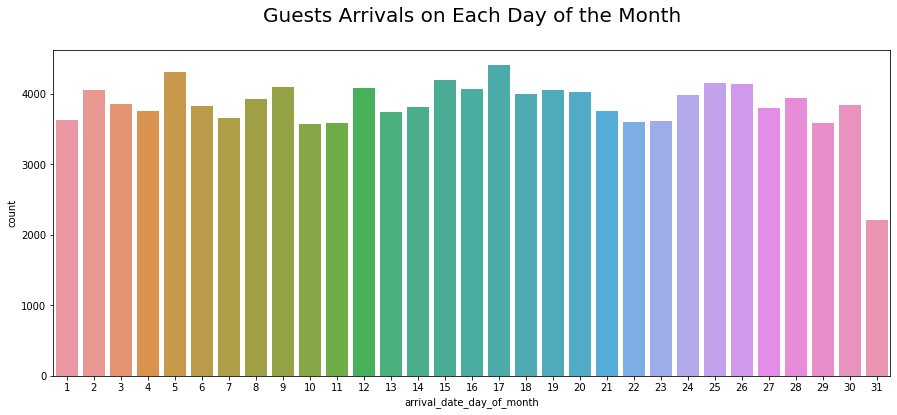

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(data['arrival_date_day_of_month'])
plt.title('Guests Arrivals on Each Day of the Month\n',fontsize=20)
plt.show()

#### The number of arrivals for each day of the month does not seem follow any pattern, except that guests do not like to arrive at the end of the month.

In [53]:
month=data['arrival_date_month'].value_counts().reset_index()
month.columns=['Month','No. of guests']
month=sd.Sort_Dataframeby_Month(month,'Month')
month

,Month,No. of guests
0,January,5921
1,February,8052
2,March,9768
3,April,11078
4,May,11780
5,June,10929
6,July,12644
7,August,13861
8,September,10500
9,October,11147


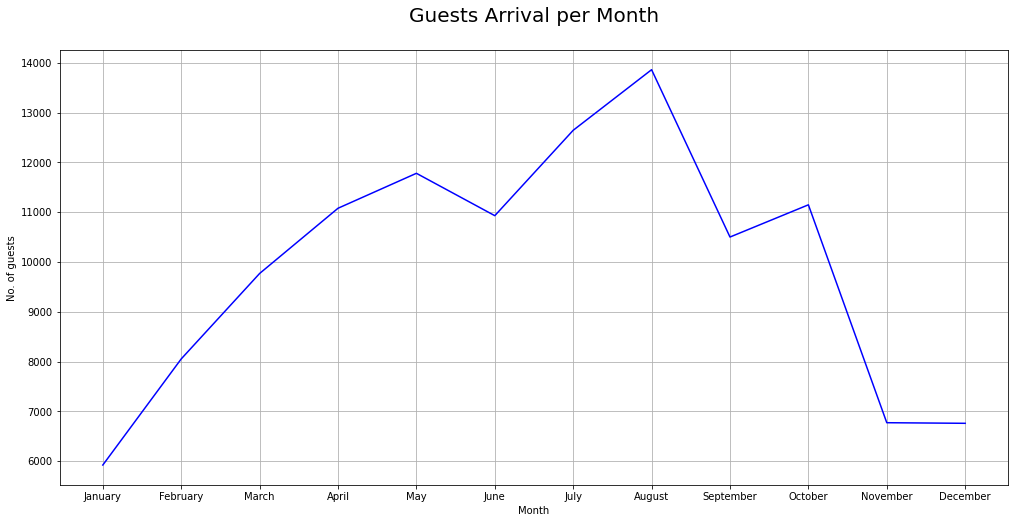

In [54]:
plt.figure(figsize=(17,8))
plt.grid()
sns.lineplot(x='Month',y='No. of guests',data=month,color='b')
plt.title('Guests Arrival per Month\n',fontsize=20)
plt.show()

#### The hotel has highest number of guests in the month of May,June, July, August when the prices are also high. So, it makes sense.
#### Let's further analyse the no. of guests of resort and city hotel.

In [55]:
# Resort Hotel

resort_hotel= resort['arrival_date_month'].value_counts().reset_index()
resort_hotel.columns=['Month','No.of guests']
resort_hotel=sd.Sort_Dataframeby_Month(resort_hotel,'Month')
resort_hotel

,Month,No.of guests
0,January,1866
1,February,2308
2,March,2571
3,April,2550
4,May,2535
5,June,2037
6,July,3137
7,August,3257
8,September,2102
9,October,2575


In [56]:
# City Hotel

city_hotel=city['arrival_date_month'].value_counts().reset_index()
city_hotel.columns=['Month','No. of guests']
city_hotel=sd.Sort_Dataframeby_Month(city_hotel,'Month')
city_hotel

,Month,No. of guests
0,January,2249
1,February,3051
2,March,4049
3,April,4010
4,May,4568
5,June,4358
6,July,4770
7,August,5367
8,September,4283
9,October,4326


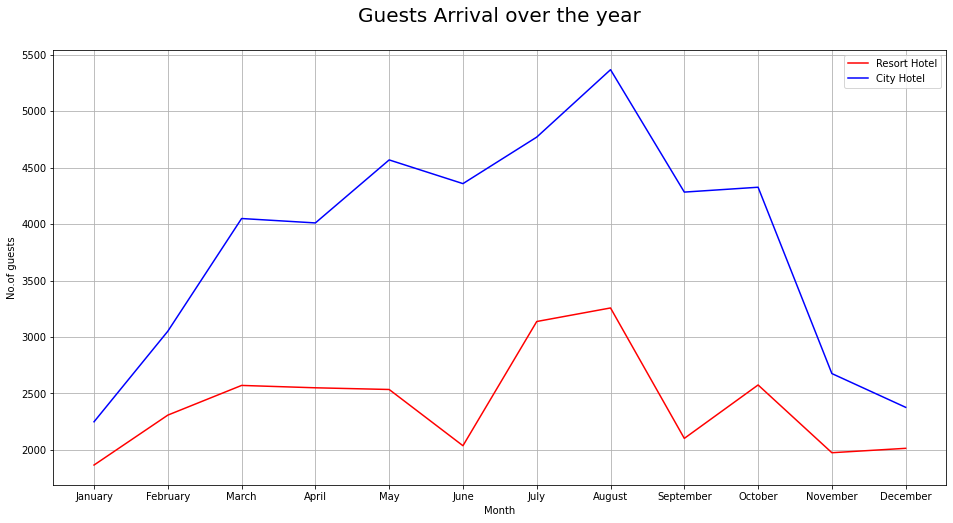

In [57]:
plt.figure(figsize=(16,8))
plt.grid()
sns.lineplot(x='Month',y='No.of guests',data=resort_hotel,color='r')
sns.lineplot(x='Month',y='No. of guests',data=city_hotel,color='b')
plt.legend(labels=['Resort Hotel','City Hotel'])
plt.title('Guests Arrival over the year\n',fontsize=20)
plt.show()

#### Both the hotels most bookings were made from July to August when the prices are also highest and few bookings made at the start and end of the year when the prices are lower. 


# Conclusion

#### 1. Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
#### 2. Most visitors were arrived in pair with no children/ Babies. So, couple is the most popular accomodation type. Hotels can make plans accordingly.
#### 3. Most of the guests are from Portugal.
#### 4. Almost 37% of the bookings were cancelled.
#### 5. We also realise that the high rate of cancellations can be due high no deposit policies.
#### 6. Repeated guest usually don't cancel the bookings.
#### 7. Half of the bookings without any special request have been cancelled and another half of them not been cancelled
#### 8. In the month of May,June, July and  August . Hotel has highest prices, highest number of guests and highest bookings cancelled.

# Thank You